# Clase teórica 3

En esta clase vamos a ver:
- Cálculo numérico en Numpy
- Manejo de dataframes en Pandas
- Gráficos en `Matplotlib`

## Cálculo numérico en `NumPy`
En esta sección, vamos a usar la librería `NumPy`. Para instalarla, ejecutar en la consola 
- `conda install -c anaconda numpy`, o
- `pip install numpy`,

aunque ya debería estar instalada ya que es una dependencia de `Pandas` (es decir, cuando instalaron `Pandas` se instaló también `NumPy` porque `Pandas` depende de `NumPy`).

Una vez instalada, la importamos:

In [1]:
import numpy as np
print(f"Tenemos instalada la versión {np.__version__} de NumPy.")

Tenemos instalada la versión 1.21.5 de NumPy.


Ejecutemos la siguiente instrucción para que cuando hagamos `print` los números aparezcan con sólo 3 decimales y sean más fáciles de leer:

In [2]:
np.set_printoptions(precision=3)

### Arrays multidimensionales: la clase `ndarray`
NumPy implementa una clase llamada `ndarray` (por array _n_-dimensional).

#### Vectores, matrices y tensores

Definimos un **vector**:

In [3]:
vector = np.array((1.,2,3,4))

In [4]:
print(vector)

[1. 2. 3. 4.]


In [5]:
vector.dtype

dtype('float64')

In [6]:
print("vector ndim: ", vector.ndim)
print("vector shape:", vector.shape)
print("vector size: ", vector.size)

vector ndim:  1
vector shape: (4,)
vector size:  4


Definimos una **matriz** (tensor de rango 2):

In [7]:
matriz = np.array([[1,2,3], [4,5,6]])
print(matriz)

[[1 2 3]
 [4 5 6]]


In [8]:
print("matriz ndim: ", matriz.ndim)
print("matriz shape:", matriz.shape)
print("matriz size: ", matriz.size)

matriz ndim:  2
matriz shape: (2, 3)
matriz size:  6


Definamos un **tensor de rango 3**:

In [9]:
tensor3 = np.array([[[-1,-2], [-3,-4]], [[0,0], [0,0]], [[2,1], [1,5]]])

In [10]:
print("tensor3 ndim: ", tensor3.ndim)
print("tensor3 shape:", tensor3.shape)
print("tensor3 size: ", tensor3.size)

tensor3 ndim:  3
tensor3 shape: (3, 2, 2)
tensor3 size:  12


In [11]:
print(tensor3)

[[[-1 -2]
  [-3 -4]]

 [[ 0  0]
  [ 0  0]]

 [[ 2  1]
  [ 1  5]]]


#### Otras formas de inicializar arrays

Definamos un tensor de todos ceros:

In [12]:
todos_ceros = np.zeros((2,3))
print(todos_ceros)

[[0. 0. 0.]
 [0. 0. 0.]]


Definamos un tensor de todos unos:

In [13]:
todos_unos = np.ones((2,2,3))
print(todos_unos)

[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]]


Definamos un tensor inicialmente vacío...

In [14]:
tensor_por_filas = np.empty((4,5))
print(tensor_por_filas) 

[[4.66e-310 0.00e+000 0.00e+000 0.00e+000 0.00e+000]
 [0.00e+000 0.00e+000 0.00e+000 0.00e+000 0.00e+000]
 [0.00e+000 0.00e+000 0.00e+000 0.00e+000 0.00e+000]
 [0.00e+000 0.00e+000 0.00e+000 0.00e+000 0.00e+000]]


...y luego usemos un ciclo for para llenar las filas una a una:

In [15]:
for i in range(tensor_por_filas.shape[0]):
    tensor_por_filas[i] = i # equivalente a tensor[i,:]
    
print(tensor_por_filas)

[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]]


Podemos hacer algo similar para las columnas:  

In [16]:
tensor_por_columnas = np.empty((4,3))
for i in range(tensor_por_columnas.shape[1]):
    tensor_por_columnas[:,i] = i # acá el : es necesario
    
print(tensor_por_columnas)

[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]


Definamos un **tensor aleatorio** (más acerca de esto más adelante):

In [20]:
a = np.random.rand(2,3)
b = np.random.rand(2,3)

In [21]:
print(a, "\n\n", b)

[[0.448 0.748 0.899]
 [0.434 0.159 0.943]] 

 [[0.441 0.165 0.288]
 [0.251 0.335 0.755]]


### Operaciones con arrays

#### Aritmética de arrays

In [22]:
a + b

array([[0.889, 0.913, 1.187],
       [0.685, 0.494, 1.698]])

In [23]:
a - b

array([[ 0.008,  0.583,  0.611],
       [ 0.183, -0.176,  0.189]])

In [24]:
a * b

array([[0.198, 0.123, 0.259],
       [0.109, 0.053, 0.712]])

In [25]:
a / b

array([[1.017, 4.53 , 3.12 ],
       [1.73 , 0.475, 1.25 ]])

In [26]:
a ** b

array([[0.702, 0.953, 0.97 ],
       [0.811, 0.54 , 0.957]])

In [27]:
a > 0.5

array([[False,  True,  True],
       [False, False,  True]])

In [28]:
2 * a + 3

array([[3.897, 4.496, 4.797],
       [3.868, 3.318, 4.887]])

#### Indexado

Indexado básico: extraer elementos individuales:

In [29]:
a[0][0]

0.4483735282603307

Indexado con booleanos (como en Pandas):

In [30]:
print(a)
a[a > 0.5]

[[0.448 0.748 0.899]
 [0.434 0.159 0.943]]


array([0.748, 0.899, 0.943])

Indexado con _slices_ (rebanadas):

In [31]:
a[:,1:3]

array([[0.748, 0.899],
       [0.159, 0.943]])

_Fancy indexing_ :

In [32]:
a[:,[0,2]]

array([[0.448, 0.899],
       [0.434, 0.943]])

### El submódulo `linalg` para álgebra lineal

In [33]:
# Esto no es necesario porque ya importamos todo numpy antes
# Pero es lo que tendríamos que correr para importar ese submódulo en particular.
# import numpy.linalg

In [39]:
a = np.random.rand(2,3)
b = np.random.rand(3,2)

In [40]:
c = a.dot(b)

In [41]:
np.linalg.inv(c).dot(c)

array([[ 1.000e+00,  9.740e-16],
       [-5.046e-16,  1.000e+00]])

In [42]:
np.linalg.eigvals(c)

array([-0.003,  1.098])

In [43]:
np.linalg.eigvals(np.linalg.inv(c))

array([-294.067,    0.911])

In [44]:
from numpy.linalg import inv

In [45]:
inv(c).dot(c)

array([[ 1.000e+00,  9.740e-16],
       [-5.046e-16,  1.000e+00]])

### Números aleatorios: submódulo `random`

In [46]:
import numpy.random # ídem linalg
import matplotlib.pyplot as plt

In [47]:
import random

In [48]:
np.random.rand(2,3,4)

array([[[0.989, 0.998, 0.872, 0.141],
        [0.037, 0.451, 0.983, 0.99 ],
        [0.781, 0.217, 0.013, 0.359]],

       [[0.022, 0.796, 0.389, 0.279],
        [0.067, 0.265, 0.351, 0.289],
        [0.542, 0.528, 0.837, 0.257]]])

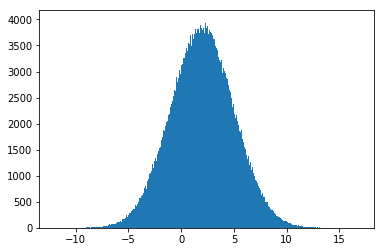

In [49]:
plt.hist(np.random.randn(1000000)*3+2, bins=1000)
plt.show()